<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLatFIAN2020/blob/master/seminar01/MLatFIAN2020_seminar01_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get the Titanic dataset:

In [2]:
!wget https://github.com/HSE-LAMBDA/MLatFIAN2020/raw/master/seminar01/train.csv

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [46]:

import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

## Task 1

In [47]:
# Compute survaval rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
# (can you do it using groupby?)

data_by_class_mean = data.groupby('Pclass').mean()

print('Survival rate for 1st, 2d and 3d class: {0:.2f}, {1:.2f}, {2:.2f}'.format(data_by_class_mean.Survived[1], 
                                                             data_by_class_mean.Survived[2],
                                                             data_by_class_mean.Survived[3]))

Survival rate for 1st, 2d and 3d class: 0.63, 0.47, 0.24


## Task 2

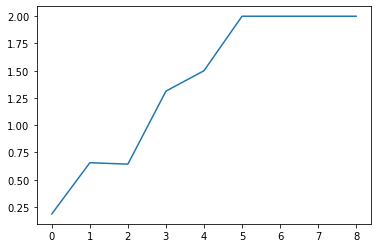

In [48]:
# Plot the average number of parents onboard (`Parch`) as a function of the 
# number of siblings onboard (`SibSp`)

import matplotlib.pyplot as plt

data_by_sib_mean = data.groupby('SibSp').mean()
plt.plot(data_by_sib_mean.index, data_by_sib_mean.Parch)

## Task 3

In [131]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def feature_selection_and_preprocessing(dataset):
    features = dataset[["Sex", "Age", "Pclass"]].copy()
    features.loc[features['Sex'] == 'male', 'Sex'] = 1
    features.loc[features['Sex'] == 'female', 'Sex'] = -1
    features["Age"] = features.Age.fillna(features["Age"].mean())
    return features

model = KNeighborsClassifier(
    p=1,
    n_neighbors=2
)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.81


## Task 4

Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

In [161]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def feature_selection_and_preprocessing(dataset):
    features = dataset[["Sex", "Age", "Pclass"]].copy()
    features.loc[features['Sex'] == 'male', 'Sex'] = 1
    features.loc[features['Sex'] == 'female', 'Sex'] = -1
    features["Age"] = features.Age.fillna(features["Age"].mean())
    return features

data = pd.read_csv("train.csv", index_col='PassengerId')

X = feature_selection_and_preprocessing(
        data.drop('Survived', axis=1))
y = data['Survived']

model = KNeighborsClassifier(p=1, n_neighbors=2)

test_error = []


for i in range(3000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=i)
    model.fit(
        X_train,
        y_train
        )
    test_predictions = model.predict(
        X_test
    )
    test_error.append(1-accuracy_score(
        y_test,
        test_predictions))


Wall time: 1min 12s


(array([ 10.,  87., 406., 801., 845., 552., 239.,  46.,   9.,   5.]),
 array([0.08 , 0.111, 0.142, 0.173, 0.204, 0.235, 0.266, 0.297, 0.328,
        0.359, 0.39 ]),
 <a list of 10 Patch objects>)

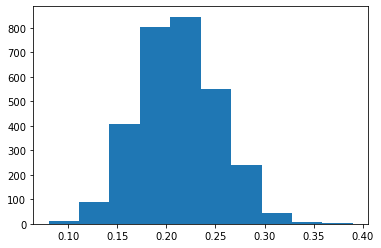

In [168]:
import matplotlib.pyplot as plt
%matplotlib inline  

plt.hist(np.array(test_error))